In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets


In [2]:
# load data
train_data = datasets.FashionMNIST(root='../input', train=True, download=True, transform=transforms.ToTensor())
validation_data = datasets.FashionMNIST(root='../input', train=False, download=True, transform=transforms.ToTensor())

In [3]:
print("Number of Samples in Train: ", len(train_data))

Number of Samples in Train:  60000


In [4]:
# showing labels of the data
print("Labels: ", train_data.targets.unique())

Labels:  tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [5]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [6]:
# create a map of labels to names
label_map = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress',
             4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker',
             8: 'Bag', 9: 'Ankle Boot'}

Sample of the Data: 


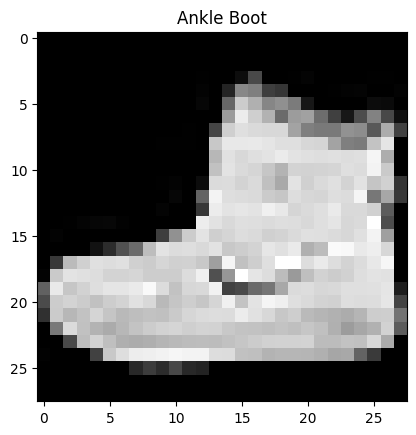

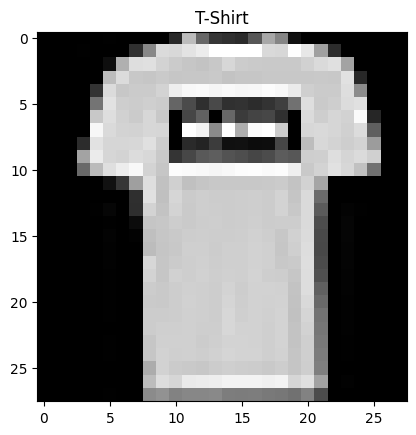

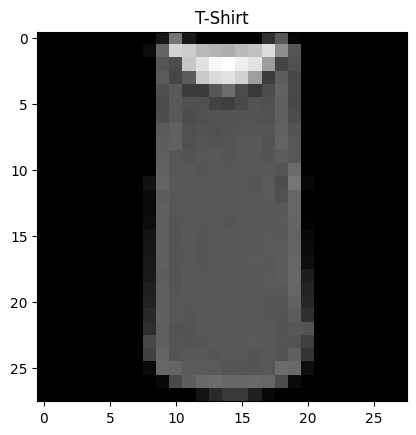

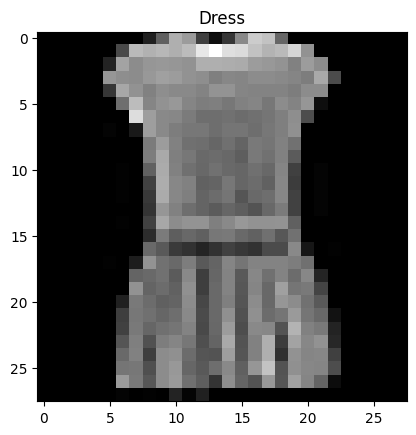

In [7]:
print("Sample of the Data: ")
for i in range(4):
    plt.imshow(train_data.data[i], cmap='gray')
    plt.title(label_map[train_data.targets[i].item()])
    plt.show()

In [8]:
train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)
validation_loader = DataLoader(dataset=validation_data, batch_size=64, shuffle=False)

In [9]:
train_loader.dataset.data.shape

torch.Size([60000, 28, 28])

In [10]:
class ConvNet (nn.Module):
    def __init__(self,in_channels = 1, out_channels = 32):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=0)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fcn1 = nn.Linear(out_channels*13*13, 50)
        torch.nn.init.kaiming_uniform(self.fcn1.weight, nonlinearity='relu')
        self.bn1 = nn.BatchNorm1d(50)
        self.fcn2 = nn.Linear(50, 10)
        torch.nn.init.kaiming_uniform(self.fcn2.weight, nonlinearity='relu')
    def forward(self,x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool1(x)
        x = x.view(x.shape[0], -1)
        x = self.fcn1(x)
        x = F.relu(x)
        x = self.bn1(x)
        x = self.fcn2(x)
        return x

In [11]:
input_channels = 1
output_channels = 100

In [12]:
model = ConvNet(input_channels, output_channels)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_428\2578375527.py:7: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  torch.nn.init.kaiming_uniform(self.fcn1.weight, nonlinearity='relu')
C:\Users\ahmed\AppData\Local\Temp\ipykernel_428\2578375527.py:10: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  torch.nn.init.kaiming_uniform(self.fcn2.weight, nonlinearity='relu')


In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [14]:
cost_list=[]
accuracy_list=[]
N_test=len(validation_data)
COST=0

def train_model(n_epochs):
    for epoch in range(n_epochs):
        COST=0
        COST_VAL=0
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            COST+=loss.data
        
        cost_list.append(COST)
        correct=0
        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
            validation_loss = criterion(z, y_test)
            COST_VAL+=validation_loss.data
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
        print("Epoch: {} - Loss: {} - Validation Loss:{} - Accuracy: {}".format(epoch+1, COST,COST_VAL,accuracy))

In [15]:
train_model(6)

Epoch: 1 - Loss: 355.0473937988281 - Validation Loss:51.74354553222656 - Accuracy: 0.8833
Epoch: 2 - Loss: 257.6181945800781 - Validation Loss:48.9193000793457 - Accuracy: 0.8867
Epoch: 3 - Loss: 226.73023986816406 - Validation Loss:46.16506576538086 - Accuracy: 0.8949
Epoch: 4 - Loss: 203.5677947998047 - Validation Loss:44.8170280456543 - Accuracy: 0.9013
Epoch: 5 - Loss: 178.83795166015625 - Validation Loss:47.736698150634766 - Accuracy: 0.8993
Epoch: 6 - Loss: 163.71372985839844 - Validation Loss:44.89054489135742 - Accuracy: 0.9028


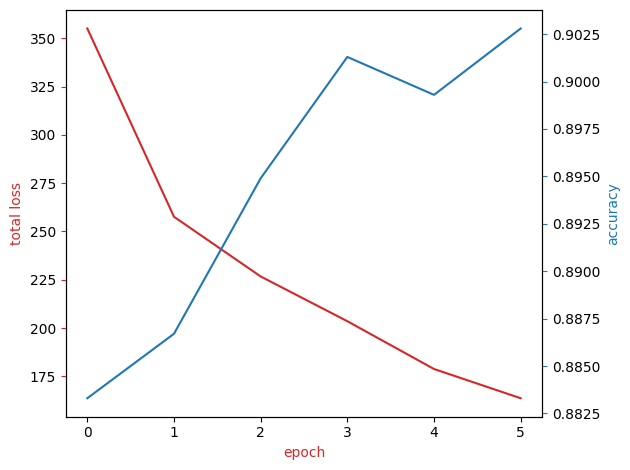

In [16]:
def plotting_loss_accuracy():
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(cost_list, color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('total loss', color=color)
    ax1.tick_params(axis='y', color=color)
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)  
    ax2.plot( accuracy_list, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()  
    plt.show()
plotting_loss_accuracy()